# City scatterplots by Köppen climate

## Load libraries

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Parameter and function defs

In [2]:
continent_color_map = dict(zip(
  ['AFR', 'AUS', 'WAS', 'CAS', 'SEA', 'EAS', 'NAM', 'SAM', 'CAM', 'EUR'] ,
  [mpl.colors.to_hex(c) for c in mpl.colormaps['tab10'].colors]
))

def point_label(x, y, c, **kwargs):
  for xx,yy,cc in zip(x,y,c):
    plt.annotate(cc,
      xy=(xx,yy), xycoords='data',
      xytext=(3,3), textcoords='offset points', size=5,
      **kwargs
    )

## Area vs population scatterplots

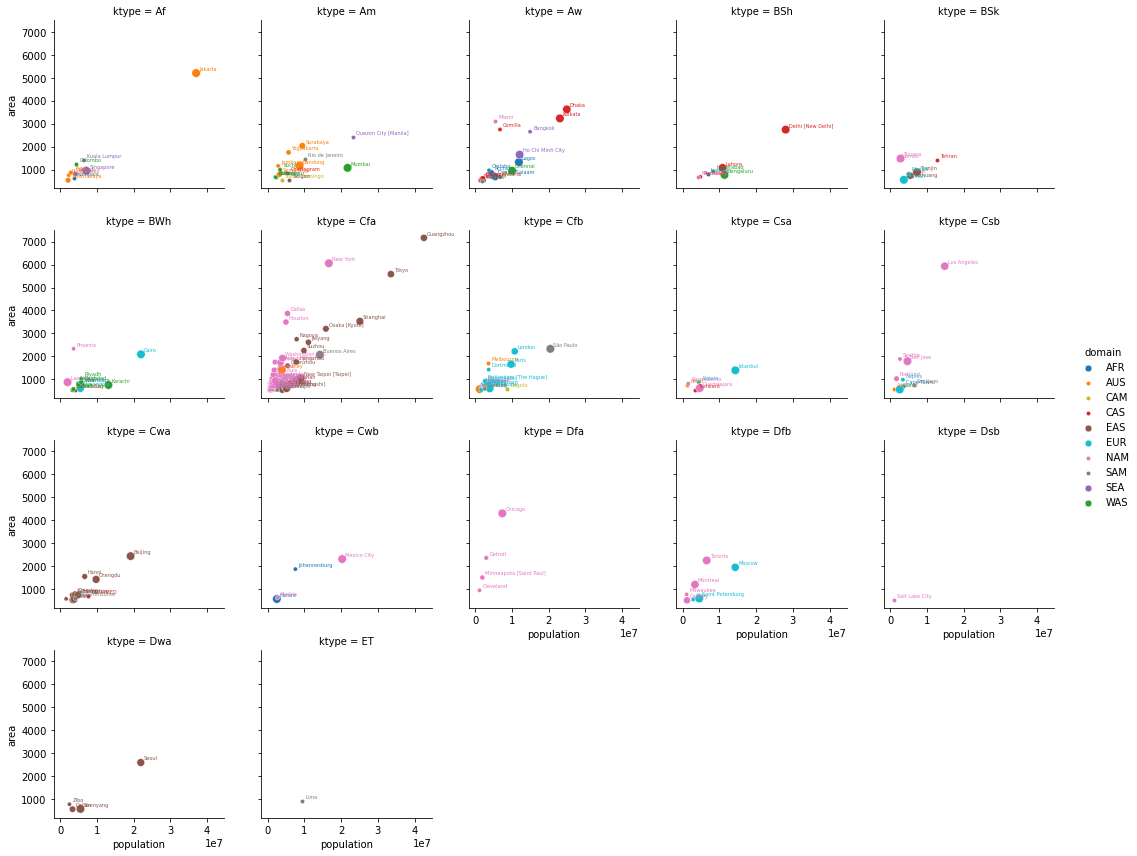

In [3]:
city_info = pd.read_csv('city_info.csv', comment='#',
  dtype = dict(domain = 'category', ktype = 'category')
)
grid = sns.FacetGrid(city_info,
  col = 'ktype',
  col_wrap = 5,
  col_order = city_info.ktype.cat.categories,
  palette = continent_color_map,
  hue = 'domain',
)
grid.map_dataframe(sns.scatterplot,
  'population',
  'area',
  size = 'density'
)
grid.add_legend()
grid.map(point_label, 'population', 'area', 'city')
plt.savefig('city_scatter.png', dpi=300, facecolor='white')